In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("C:/Users/nizar/Desktop/S2/Machine Learning/TP 2/univariate_linear_regression_dataset.csv")

In [2]:
x= df.iloc[:,0] ; n_samples = len(x); x=np.array(x).reshape((n_samples, 1)) #96

In [3]:
y= df.iloc[:,1] ; y=np.array(y).reshape((n_samples, 1))

In [4]:
x=np.array(x).reshape((n_samples, 1))

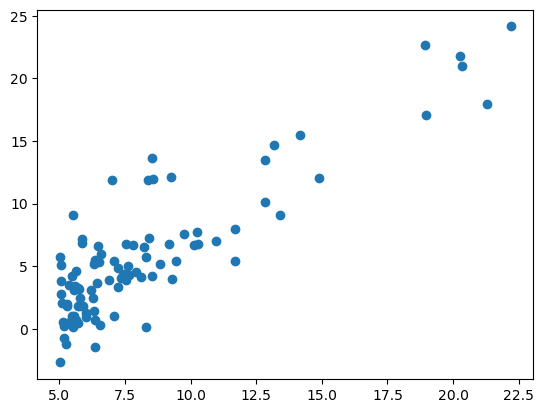

In [7]:
plt.scatter(x, y) # afficher les résultats. X en abscisse et y en ordonnée
plt.show()

In [8]:
# ajout de la colonne de biais a X
X = np.hstack((x, np.ones(x.shape)))

In [9]:
# création d'un vecteur parametre theta
theta = np.random.randn(2, 1)
print(theta)

[[0.36333856]
 [0.83108479]]


In [12]:
def f(X, theta):
    return X.dot(theta)
def erreur_somme_des_distances(X, y, theta):
    m = len(y)
    return (1/(2*m))*np.sum((f(X, theta)-y)**2)
def gradient(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(f(X, theta) - y)
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    # création d'un tableau de stockage pour enregistrer l'évolution des erreurs
    historique_des_erreurs = np.zeros(n_iterations)
    for i in range(0, n_iterations):
        theta = theta - learning_rate * gradient(X, y, theta) # mise a jour du theta
        historique_des_erreurs[i] = erreur_somme_des_distances(X, y, theta)
    return theta, historique_des_erreurs

In [13]:
# Example de test :
n_iterations = 10000
learning_rate = 0.01 # modifier pour voir l'effet
theta_final, historique_des_erreurs=gradient_descent(X, y, theta, learning_rate, n_iterations)
print(theta_final) # theta une fois que la machine a été entrainée

[[ 1.21354725]
 [-4.21150393]]


In [14]:
# création d'un vecteur prédictions qui contient les prédictions de notre modele final
predictions = f(X, theta_final)

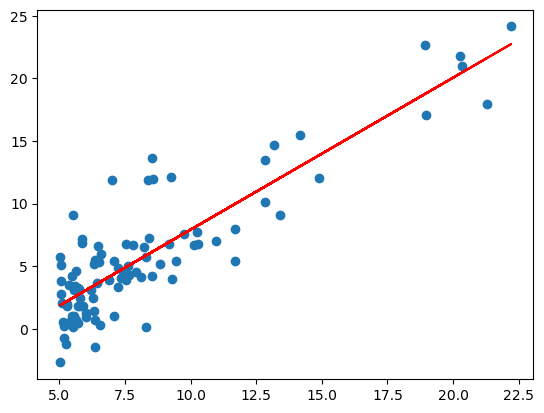

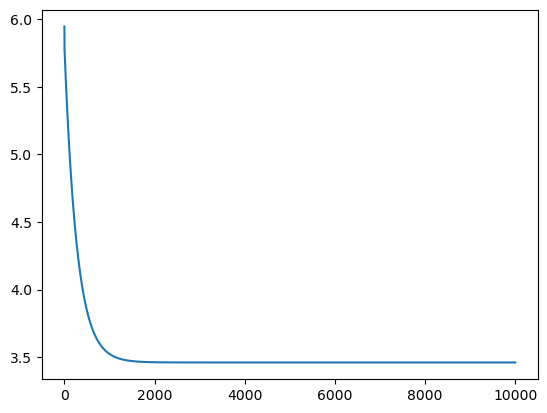

[23.09330912]


In [18]:
# Affiche les résultats de prédictions (en rouge) par rapport a notre Dataset (en bleu)
plt.scatter(x, y)
plt.plot(x, predictions, c='r')
plt.show()
plt.figure()
plt.plot(range(n_iterations), historique_des_erreurs)
plt.show()
print(f(np.array([22.5,1]), theta_final))